# How can we catch more bad guys ?

In [30]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [3]:
# First Group by to get counted and sorted incident values for each district
df_agg = data.groupby(['NAME','OFFENSE_CODE_GROUP'])\
                .agg(['count'])['INCIDENT_NUMBER']\
                .groupby('NAME', group_keys=False)\
                .apply(lambda x: x.sort_values(by='count', ascending=False))
df_agg.reset_index(inplace=True)
result_most_commons = df_agg.groupby(['NAME']).head(1).set_index('NAME')

## What's happening the most in districts ?

Let's take two districts as examples and see what are the most common crimes in there :

In [4]:
# Making boolean series filtering on town
my_filter = df_agg["NAME"]=="Brighton"
  
# Filtering data on the previous dataset to get all categories of incidents by district
df_agg.where(my_filter)
df_brighton = df_agg.dropna()

In [5]:
# Making boolean series filtering on town
my_filter = df_agg["NAME"]=="Roxbury"
  
# Filtering data on the previous dataset to get all categories of incidents by district
df_agg.where(my_filter)
df_roxbury = df_agg.dropna()

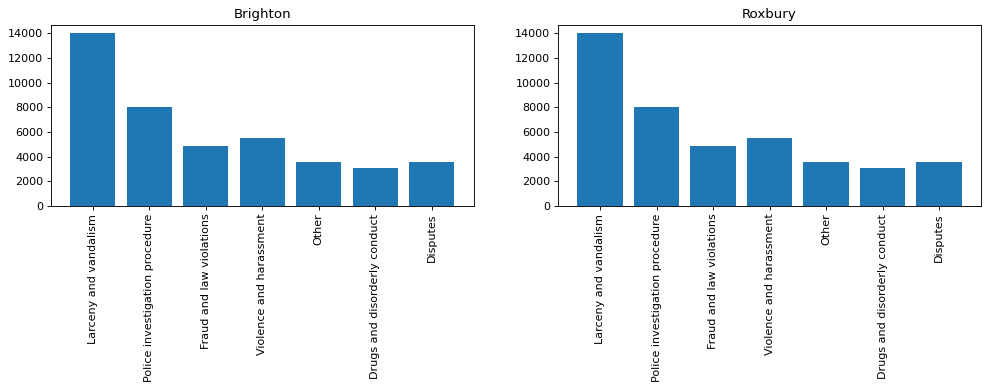

In [6]:
figure(figsize=(15, 3), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Brighton')
plt.bar(df_brighton['OFFENSE_CODE_GROUP'], df_brighton['count'])
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
plt.title('Roxbury')
plt.bar(df_roxbury['OFFENSE_CODE_GROUP'], df_roxbury['count'])
plt.xticks(rotation = 90)
plt.show()

We have saw that Larceny and vandalism is the most current crimes in both district, it's almost the double of the second place : Police investigation procedure.

## What about the hours of the crimes ?

In [7]:
data_hours = data.copy()
data_hours['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'], format='%Y-%m-%d %H:%M:%S')
data_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237221 entries, 0 to 237220
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      237221 non-null  object        
 1   OFFENSE_CODE_GROUP   237221 non-null  object        
 2   SHOOTING             237221 non-null  int64         
 3   OCCURRED_ON_DATE     237221 non-null  datetime64[ns]
 4   LAT                  237221 non-null  float64       
 5   LONG                 237221 non-null  float64       
 6   NAME                 237221 non-null  object        
 7   LAT_POLICE_STATION   237221 non-null  float64       
 8   LONG_POLICE_STATION  237221 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 26.2+ MB


In [8]:
data_hours.set_index('OCCURRED_ON_DATE', inplace=True)

In [9]:
hours = data_hours.index.hour
data_hours = pd.concat([data_hours, pd.DataFrame(hours, index=data_hours.index)], axis = 1)
data_hours

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,OCCURRED_ON_DATE
OCCURRED_ON_DATE,,,,,,,,,
2015-08-28 10:20:00,I192068249,Other,0,42.330119,-71.084251,Roxbury,42.328894,-71.085359,10
2015-09-14 09:31:00,I182074094,Violence and harassment,0,42.315142,-71.067047,Roxbury,42.328894,-71.085359,9
2015-07-12 15:37:00,I182054888,Violence and harassment,0,42.312243,-71.075499,Roxbury,42.328894,-71.085359,15
2015-07-12 15:37:00,I182054888,Other,0,42.312243,-71.075499,Roxbury,42.328894,-71.085359,15
2015-07-12 15:37:00,I182054888,Other,0,42.312243,-71.075499,Roxbury,42.328894,-71.085359,15
...,...,...,...,...,...,...,...,...,...
2018-08-09 18:00:00,I172049757,Police investigation procedure,0,42.355216,-71.060129,Charlestown,42.361800,-71.060300,18
2018-08-09 18:00:00,I172049757,Drugs and disorderly conduct,0,42.355216,-71.060129,Charlestown,42.361800,-71.060300,18
2018-12-12 05:00:00,I172027369,Other,0,42.376852,-71.068873,Charlestown,42.361800,-71.060300,5


In [13]:
data_hours.index.rename('datetime', inplace=True)
data_hours

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,OCCURRED_ON_DATE
datetime,,,,,,,,,
2015-08-28 10:20:00,I192068249,Other,0,42.330119,-71.084251,Roxbury,42.328894,-71.085359,10
2015-09-14 09:31:00,I182074094,Violence and harassment,0,42.315142,-71.067047,Roxbury,42.328894,-71.085359,9
2015-07-12 15:37:00,I182054888,Violence and harassment,0,42.312243,-71.075499,Roxbury,42.328894,-71.085359,15
2015-07-12 15:37:00,I182054888,Other,0,42.312243,-71.075499,Roxbury,42.328894,-71.085359,15
2015-07-12 15:37:00,I182054888,Other,0,42.312243,-71.075499,Roxbury,42.328894,-71.085359,15
...,...,...,...,...,...,...,...,...,...
2018-08-09 18:00:00,I172049757,Police investigation procedure,0,42.355216,-71.060129,Charlestown,42.361800,-71.060300,18
2018-08-09 18:00:00,I172049757,Drugs and disorderly conduct,0,42.355216,-71.060129,Charlestown,42.361800,-71.060300,18
2018-12-12 05:00:00,I172027369,Other,0,42.376852,-71.068873,Charlestown,42.361800,-71.060300,5


In [11]:
# First Group by to get counted and sorted incident values for each district
df_agg = data_hours.groupby(['NAME','OCCURRED_ON_DATE'])\
                .agg(['count'])['INCIDENT_NUMBER']\
                .groupby('NAME', group_keys=False)\
                .apply(lambda x: x.sort_values(by='count', ascending=False))
df_agg.reset_index(inplace=True)
result_most_commons = df_agg.groupby(['NAME']).head(1).set_index('NAME')

In [16]:
res = pd.DataFrame(result_most_commons['OCCURRED_ON_DATE'])
res.reset_index(inplace=True)

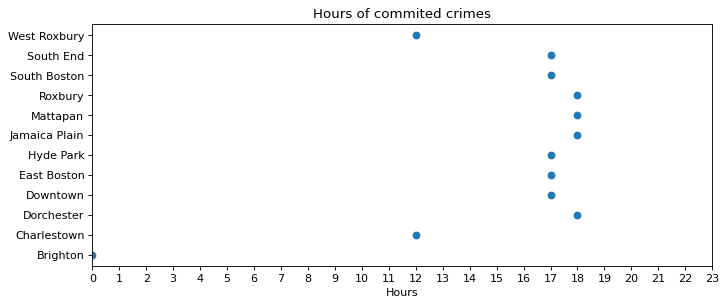

In [52]:
figure(figsize=(10, 4), dpi=80)
plt.scatter(res['OCCURRED_ON_DATE'], res['NAME'])
plt.xticks(np.arange(0,24))
plt.xlabel("Hours")
plt.xlim(right = 23, left = 0)
plt.title('Hours of commited crimes')
plt.show()

As we can see, most of the crimes are commited between 5pm and 7pm

In [39]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

In [40]:
# YOUR CODE HERE

# Copy data to not work directly on the dataset
df_average = data.copy()

# Apply the haversine distance function to every row in the dataset
# using LONG, LAT of incidents and LONG_POLICE_STATION, LAT_POLICE_STATION of police stations for each district
df_average["haversine_distance"] = df_average.apply(
    lambda row: haversine_distance(
        row["LONG"],
        row["LAT"],
        row["LONG_POLICE_STATION"],
        row["LAT_POLICE_STATION"],
    ),
    axis=1,
)

In [49]:
result_distance = pd.DataFrame(df_average.groupby(['NAME']).mean()['haversine_distance'])
result_distance.reset_index(inplace=True)
result_distance

,NAME,haversine_distance
0,Brighton,3.770867
1,Charlestown,58.758394
2,Dorchester,3.174444
3,Downtown,6.336657
4,East Boston,5.568626
5,Hyde Park,2.397613
6,Jamaica Plain,2.585737
7,Mattapan,1.908636
8,Roxbury,2.989029
9,South Boston,31.454220


## Now, let's see how far are the commited crime from the police station depending on the district

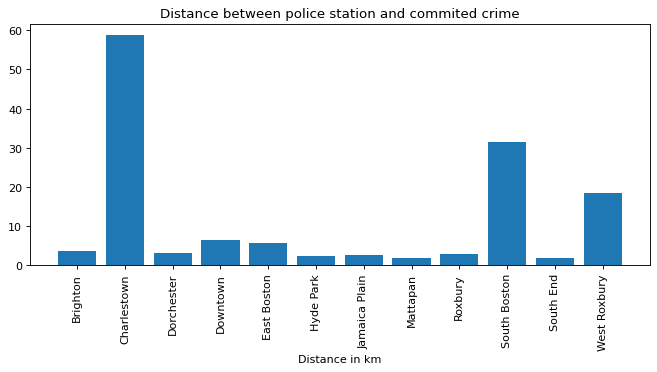

In [51]:
figure(figsize=(10, 4), dpi=80)
plt.bar(result_distance['NAME'], result_distance['haversine_distance'])
plt.xticks(rotation=90)
plt.xlabel("Distance in km")
plt.title('Distance between police station and commited crime')
plt.show()

In conclusion :

- We should investigate on why there is so much larceny and vandalism, it's the most frequent case in 90% of the districts.
- We could deploy more police teams between 5pm and 7pm to prevent and anticipate the peak of commited crimes before night time.
- For certain district where the crimes are far from the police station, maybe we can relocate the station to be more effective on the duration between the crime and the intervention of the police.

Thank for your attention